In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [46]:
df_train=pd.read_csv('train_indessa.csv')
df_test=pd.read_csv('test_indessa.csv')

354951

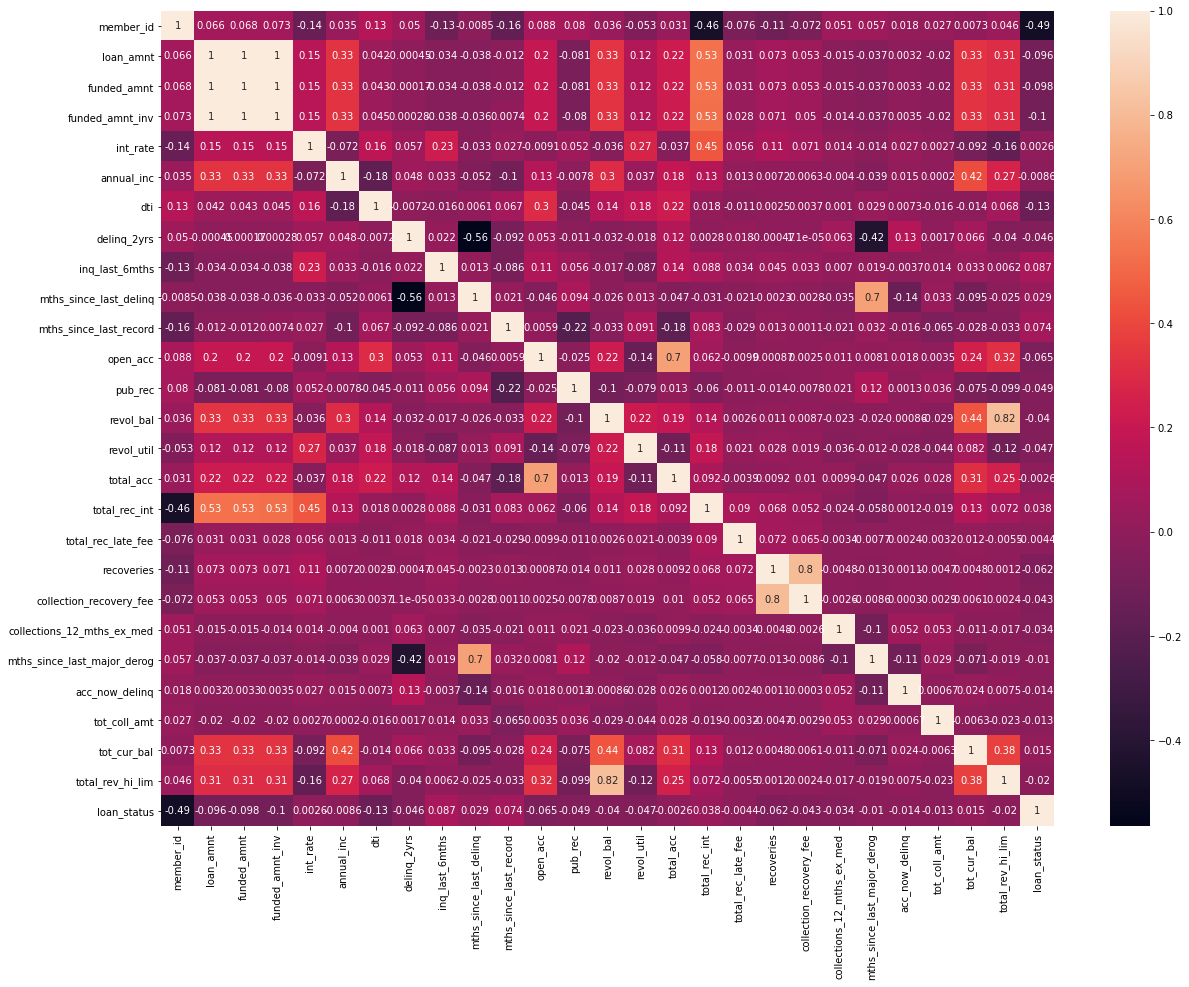

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = df_train.corr()
plt.subplots(figsize=(20,15))

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [4]:
df_train.drop(['funded_amnt'],axis=1,inplace=True)
df_test.drop(['funded_amnt'],axis=1,inplace=True)

In [5]:
cols=['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

print('Number of missing values in the columns that have missing values\n')
for col in cols:
    if df_train[col].isnull().sum()>0:
        print('Training set ~ '+col+': ',df_train[col].isnull().sum())
    if df_test[col].isnull().sum()>0:
        print('Test set ~ '+'           '+': ',df_test[col].isnull().sum())

Number of missing values in the columns that have missing values

Training set ~ emp_title:  30833
Test set ~            :  20629
Training set ~ emp_length:  26891
Test set ~            :  17934
Training set ~ annual_inc:  3
Test set ~            :  1
Training set ~ title:  90
Test set ~            :  62
Training set ~ delinq_2yrs:  16
Test set ~            :  13
Training set ~ inq_last_6mths:  16
Test set ~            :  13
Training set ~ mths_since_last_delinq:  272554
Test set ~            :  181758
Training set ~ mths_since_last_record:  450305
Test set ~            :  300021
Training set ~ open_acc:  16
Test set ~            :  13
Training set ~ pub_rec:  16
Test set ~            :  13
Training set ~ revol_util:  287
Test set ~            :  215
Training set ~ total_acc:  16
Test set ~            :  13
Training set ~ collections_12_mths_ex_med:  95
Test set ~            :  50
Training set ~ mths_since_last_major_derog:  399448
Test set ~            :  266228
Training set ~ acc_now

In [6]:
df_train.drop(['member_id','batch_enrolled','verification_status_joint','desc'],axis=1,inplace=True)
df_test.drop(['batch_enrolled','verification_status_joint','desc'],axis=1,inplace=True)

In [7]:
print('Unique values in each Categorical column\n')
for col in cols:
    if df_train[col].dtype=='O':
        print(col + ':', df_train[col].nunique())
    if df_test[col].dtype=='O':
        print(col + ':', df_test[col].nunique())

Unique values in each Categorical column

term: 2
term: 2
grade: 7
grade: 7
sub_grade: 35
sub_grade: 35
emp_title: 190124
emp_title: 135102
emp_length: 11
emp_length: 11
home_ownership: 6
home_ownership: 5
verification_status: 3
verification_status: 3
pymnt_plan: 2
pymnt_plan: 2
purpose: 14
purpose: 14
title: 39693
title: 27975
zip_code: 917
zip_code: 904
addr_state: 51
addr_state: 51
initial_list_status: 2
initial_list_status: 2
application_type: 2
application_type: 2
last_week_pay: 98
last_week_pay: 93


In [8]:
print(df_train['pymnt_plan'].value_counts())
print(df_test['pymnt_plan'].value_counts())

n    532420
y         8
Name: pymnt_plan, dtype: int64
n    354949
y         2
Name: pymnt_plan, dtype: int64


In [9]:
df_train.drop('pymnt_plan',axis=1,inplace=True)
df_test.drop('pymnt_plan',axis=1,inplace=True)

In [10]:
print(df_train['application_type'].value_counts())
print(df_test['application_type'].value_counts())

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64
INDIVIDUAL    354745
JOINT            206
Name: application_type, dtype: int64


In [11]:
df_train.drop('application_type',axis=1,inplace=True)
df_test.drop('application_type',axis=1,inplace=True)

In [12]:
print(df_train['home_ownership'].value_counts())
print(df_test['home_ownership'].value_counts())

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64
MORTGAGE    177617
RENT        142449
OWN          34806
OTHER           65
NONE            14
Name: home_ownership, dtype: int64


In [13]:
df_train=df_train[df_train['home_ownership']!='ANY']

In [14]:
df_train['term']=df_train['term'].str[:2].astype(int)
df_test['term']=df_test['term'].str[:2].astype(int)

In [15]:
df_train['recovery_fee+recoveries']=df_train['collection_recovery_fee']+df_train['recoveries']
df_train['income_to_loan_ratio'] = np.round_(df_train['annual_inc']/df_train['funded_amnt_inv'], decimals = 2)
df_train['remaining_acc']=df_train['total_acc']-df_train['open_acc']
df_train['total_rec']=df_train['total_rec_int']+df_train['total_rec_late_fee']

df_test['recovery_fee+recoveries']=df_test['collection_recovery_fee']+df_test['recoveries']
df_test['income_to_loan_ratio'] = np.round_(df_test['annual_inc']/df_test['funded_amnt_inv'], decimals = 2)
df_test['remaining_acc']=df_test['total_acc']-df_test['open_acc']
df_test['total_rec']=df_test['total_rec_int']+df_test['total_rec_late_fee']
# df.drop(['recoveries', 'collection_recovery_fee'],axis=1,inplace=True)

In [16]:
df_train['last_week_pay']=df_train['last_week_pay'].str.replace('th week','')
df_train['last_week_pay']=df_train['last_week_pay'].str.replace('NA','')
df_train['last_week_pay']=pd.to_numeric(df_train['last_week_pay'],errors='coerce')

df_test['last_week_pay']=df_test['last_week_pay'].str.replace('th week','')
df_test['last_week_pay']=df_test['last_week_pay'].str.replace('NA','')
df_test['last_week_pay']=pd.to_numeric(df_test['last_week_pay'],errors='coerce')

In [17]:
df_train['emp_length']=df_train['emp_length'].str.replace(' years','')
df_train['emp_length']=df_train['emp_length'].str.replace(' year','')
df_train['emp_length']=df_train['emp_length'].str.replace('+','')
df_train['emp_length']=df_train['emp_length'].str.replace('< 1','0')
df_train['emp_length']=pd.to_numeric(df_train['emp_length'],errors='coerce')

df_test['emp_length']=df_test['emp_length'].str.replace(' years','')
df_test['emp_length']=df_test['emp_length'].str.replace(' year','')
df_test['emp_length']=df_test['emp_length'].str.replace('+','')
df_test['emp_length']=df_test['emp_length'].str.replace('< 1','0')
df_test['emp_length']=pd.to_numeric(df_test['emp_length'],errors='coerce')

<ipython-input-17-fb4590c98fbb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_train['emp_length']=df_train['emp_length'].str.replace('+','')
<ipython-input-17-fb4590c98fbb>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['emp_length']=df_test['emp_length'].str.replace('+','')


In [18]:
letters=['A','B','C','D','E','F','G']
val=['','1','2','3','4','5','6']

for l,v in zip(letters,val):
    df_train['sub_grade']= df_train['sub_grade'].str.replace(l, v)
    df_test['sub_grade']= df_test['sub_grade'].str.replace(l, v)

df_train['sub_grade'] = pd.to_numeric(df_train['sub_grade'], errors='coerce')
df_test['sub_grade'] = pd.to_numeric(df_test['sub_grade'], errors='coerce')

In [19]:
p1=df_train['funded_amnt_inv']
r1=df_train['int_rate'] /(100*12)
n1=df_train['term']

df_train['monthly_emi'] = np.round_((p1*r1*(1+r1)**n1)/((1+r1)**n1-1), decimals = 2)
df_train['monthly_income']=np.round_(df_train['annual_inc']/12, decimals = 2)

p2=df_test['funded_amnt_inv']
r2=df_test['int_rate'] /(100*12)
n2=df_test['term']

df_test['monthly_emi'] = np.round_((p2*r2*(1+r2)**n2)/((1+r2)**n2-1), decimals = 2)
df_test['monthly_income']=np.round_(df_test['annual_inc']/12, decimals = 2)

In [20]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
columns = ['mths_since_last_delinq','revol_util','last_week_pay','tot_coll_amt','delinq_2yrs','collections_12_mths_ex_med',
           'tot_cur_bal','total_rev_hi_lim','emp_length','revol_util','mths_since_last_record','mths_since_last_major_derog',
           'annual_inc','inq_last_6mths','open_acc','pub_rec','total_acc','acc_now_delinq','income_to_loan_ratio','remaining_acc',
           'monthly_income']
for col in columns:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    
for col in columns:
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [23]:
cat_cols = ['grade','home_ownership','verification_status','purpose','initial_list_status']
for col in cat_cols:
    one_hot = pd.get_dummies(df_train[col])
    df_train = df_train.drop(col,axis = 1)
    df_train = df_train.join(one_hot)
    one_hot=0

for col in cat_cols:
    one_hot = pd.get_dummies(df_test[col])
    df_test = df_test.drop(col,axis = 1)
    df_test = df_test.join(one_hot)
    one_hot=0

In [24]:
df_train.drop(['zip_code','emp_title','title','addr_state'],axis=1,inplace=True)
df_test.drop(['zip_code','emp_title','title','addr_state'],axis=1,inplace=True)

In [25]:
X=df_train.drop('loan_status',axis=1)
Y=df_train.loan_status

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
xgb=XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=15, gamma=10, objective="binary:logistic")

In [29]:
xgb.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:47] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
pred=xgb.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print('Accuracy : ',accuracy_score(y_test,pred))
print('Precision : ',precision_score(y_test,pred))
print('Recall : ',recall_score(y_test,pred))
print('ROC_AUC : ',roc_auc_score(y_test,pred))
print('---------------------------------')
print('Confusion matrix')
print(confusion_matrix(y_test, pred))
print('---------------------------------')
print(classification_report(y_test, pred))

Accuracy :  0.9168239658167817
Precision :  0.9015982296533072
Recall :  0.7278285033743549
ROC_AUC :  0.8516072217345357
---------------------------------
[[79294  2001]
 [ 6856 18334]]
---------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     81295
           1       0.90      0.73      0.81     25190

    accuracy                           0.92    106485
   macro avg       0.91      0.85      0.88    106485
weighted avg       0.92      0.92      0.91    106485



In [42]:
algorithms={
    'XGBClassifier' : {
        'model' : XGBClassifier(),
        'param' : {
            'learning_rate': [0.1,0.2],
            'n_estimators' : [200,500,1000],
            'max_depth' : [7, 15, 20],
            'gamma' : [5, 10, 15]
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(x_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [92]:
!pip3 install catboost

In [38]:
from catboost import CatBoostClassifier

In [40]:
catBC = CatBoostClassifier(learning_rate=0.1, n_estimators=1500, subsample=0.70, max_depth=7, scale_pos_weight=2.5, silent=True)

In [41]:
catBC.fit(x_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [42]:
pred2=catBC.predict(x_test)

In [43]:
print('Accuracy : ',accuracy_score(y_test,pred2))
print('Precision : ',precision_score(y_test,pred2))
print('Recall : ',recall_score(y_test,pred2))
print('ROC_AUC : ',roc_auc_score(y_test,pred2))
print('---------------------------------')
print('Confusion matrix')
print(confusion_matrix(y_test, pred2))
print('---------------------------------')
print(classification_report(y_test, pred2))

Accuracy :  0.9222801333521153
Precision :  0.8475098619329389
Recall :  0.8187772925764192
ROC_AUC :  0.8865643643520511
---------------------------------
Confusion matrix
[[77584  3711]
 [ 4565 20625]]
---------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     81295
           1       0.85      0.82      0.83     25190

    accuracy                           0.92    106485
   macro avg       0.90      0.89      0.89    106485
weighted avg       0.92      0.92      0.92    106485



In [44]:
len(df_test)

354951

In [49]:
df_test_final=df_test.drop('member_id',axis=1)

In [48]:
df_test

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,f,w
0,11937648,14000,14000.0,60,16.24,25,4.0,73500.0,28.65,1.0,...,0,0,0,0,0,0,0,0,1,0
1,38983318,16000,16000.0,60,9.49,12,5.0,105000.0,31.19,0.0,...,1,0,0,0,0,0,0,0,0,1
2,27999917,11050,11050.0,60,15.61,31,10.0,62300.0,21.73,1.0,...,0,0,0,0,0,0,0,0,0,1
3,61514932,35000,34700.0,60,12.69,22,10.0,150000.0,17.27,0.0,...,0,0,0,0,0,0,0,0,1,0
4,59622821,6500,6500.0,36,6.89,3,5.0,52000.0,20.19,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,19145105,15000,15000.0,36,6.49,2,1.0,97250.0,12.46,0.0,...,0,0,0,0,0,0,0,0,0,1
354947,46304777,35000,35000.0,60,25.89,63,1.0,180000.0,11.78,2.0,...,0,0,0,0,0,0,0,0,1,0
354948,903745,14000,13975.0,60,17.51,44,10.0,56000.0,16.44,0.0,...,0,0,0,0,0,0,0,0,1,0
354949,53032475,20000,20000.0,36,7.26,4,0.0,100000.0,15.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
final_predictions=catBC.predict_proba(df_test_final)

In [53]:
final_predictions[:][1]

array([[0.82478929, 0.17521071],
       [0.82943658, 0.17056342],
       [0.81259852, 0.18740148],
       ...,
       [0.22380527, 0.77619473],
       [0.9773857 , 0.0226143 ],
       [0.26306425, 0.73693575]])

In [56]:
k=final_predictions[:,1]

In [64]:
df_test['loan_status']=k

In [71]:
m=df_test[['member_id','loan_status']]
m

,member_id,loan_status
0,11937648,0.175211
1,38983318,0.170563
2,27999917,0.187401
3,61514932,0.057137
4,59622821,0.134506
...,...,...
354946,19145105,0.059894
354947,46304777,0.601561
354948,903745,0.776195
354949,53032475,0.022614


In [72]:
m.to_csv('test_data_predictions.csv')